In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [3]:
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
print(df.shape)
df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#Define a dictionary to map labels to corresponding ASL alphabets
asl_alphabets = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}

# Create a new column with the corresponding ASL alphabet for each label
df['label'] = df['label'].map(asl_alphabets)
# put labels into y variable
y = df["label"]
X = df.drop(labels = ["label"],axis = 1) 

In [5]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [6]:
X = X / 255.0
print("X shape: ",X.shape)

X shape:  (27455, 784)


In [7]:
X = X.values.reshape(-1,28,28,1)
print("X shape: ",X.shape)

X shape:  (27455, 28, 28, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (24709, 28, 28, 1)
x_test shape (2746, 28, 28, 1)
y_train shape (24709, 24)
y_test shape (2746, 24)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

model = Sequential()

#Feature Extraction Layer #1
model.add(Conv2D(12 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#Feature Extraction Layer #2
model.add(Conv2D(24 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 24)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 24)          0

In [11]:
#Data augmentations
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        )
datagen.fit(X_train)
#vertical_flip and horizontal_flip is not applied since it could have lead to misclassification.

In [12]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 64) ,epochs = 10 , validation_data = (X_test, y_test))

Epoch 1/10
387/387 [==============================] - 16s 38ms/step - loss: 2.0643 - accuracy: 0.3721 - val_loss: 0.6420 - val_accuracy: 0.8307
Epoch 2/10
387/387 [==============================] - 15s 38ms/step - loss: 0.9464 - accuracy: 0.6928 - val_loss: 0.2978 - val_accuracy: 0.9334
Epoch 3/10
387/387 [==============================] - 14s 37ms/step - loss: 0.6341 - accuracy: 0.7920 - val_loss: 0.1425 - val_accuracy: 0.9763
Epoch 4/10
387/387 [==============================] - 15s 38ms/step - loss: 0.4526 - accuracy: 0.8508 - val_loss: 0.0813 - val_accuracy: 0.9873
Epoch 5/10
387/387 [==============================] - 14s 37ms/step - loss: 0.3685 - accuracy: 0.8779 - val_loss: 0.0584 - val_accuracy: 0.9869
Epoch 6/10
387/387 [==============================] - 15s 39ms/step - loss: 0.2946 - accuracy: 0.9013 - val_loss: 0.0572 - val_accuracy: 0.9873
Epoch 7/10
387/387 [==============================] - 15s 38ms/step - loss: 0.2428 - accuracy: 0.9200 - val_loss: 0.0277 - val_accuracy:

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predict for test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

86/86 [==============================] - 1s 6ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


Text(0, 0.5, 'Accuracy')

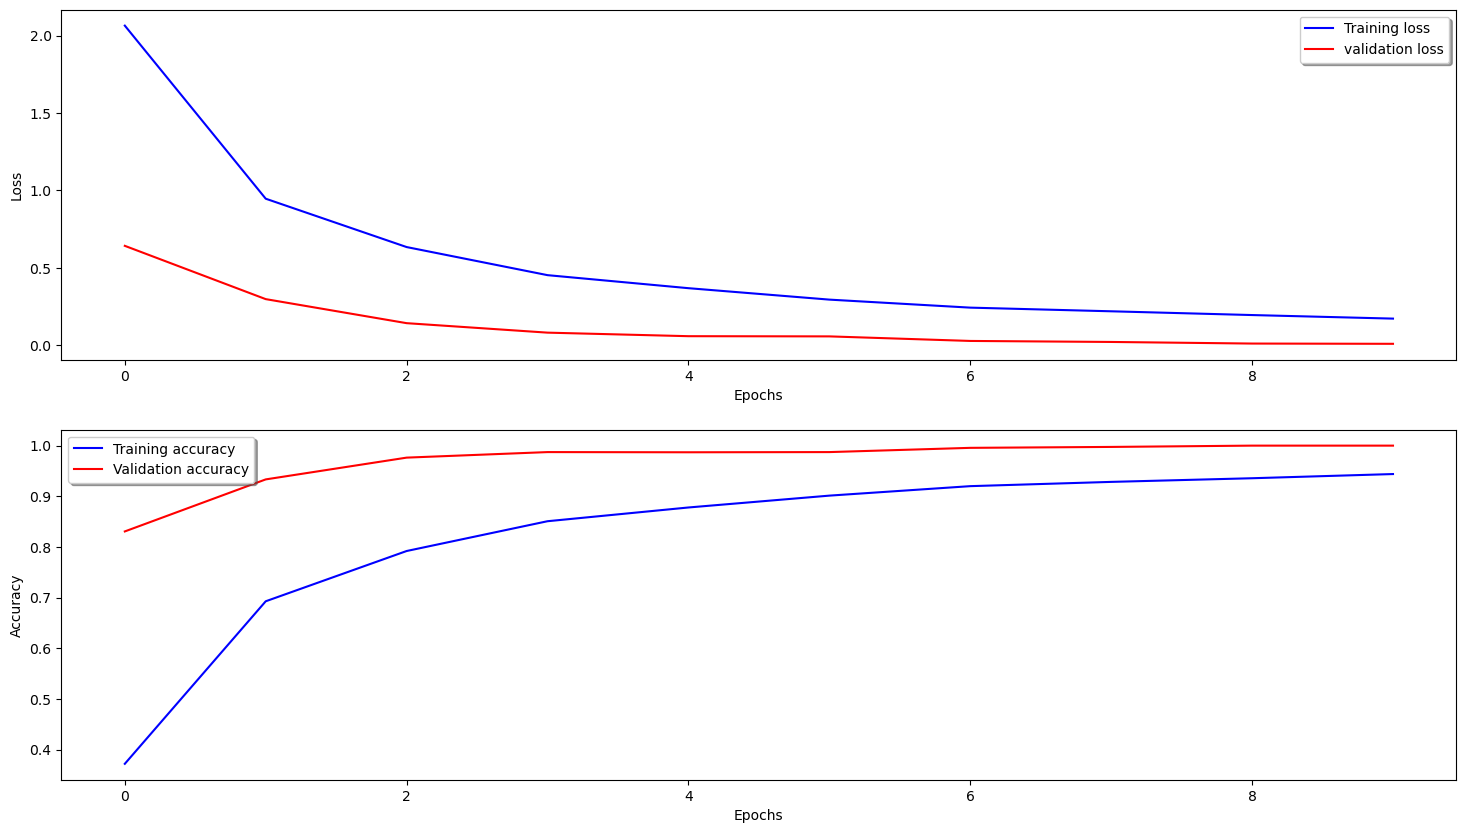

In [15]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

In [13]:
test_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
test_df['label'] = test_df['label'].map(asl_alphabets)

In [16]:
#Defining label and input for the test data.
test_X = test_df.drop(labels = ["label"],axis = 1) 
test_y = test_df["label"]

# Normalize the data
test_X = test_X / 255.0

# Reshape
test_X = test_X.values.reshape(-1,28,28,1)

In [17]:
y_pred = model.predict(test_X)
test_X__ = test_X.reshape(test_X.shape[0], 28, 28)

#Decoding the binary labels back into alphabets
y_pred = label_binarizer.inverse_transform(y_pred)

225/225 [==============================] - 1s 6ms/step


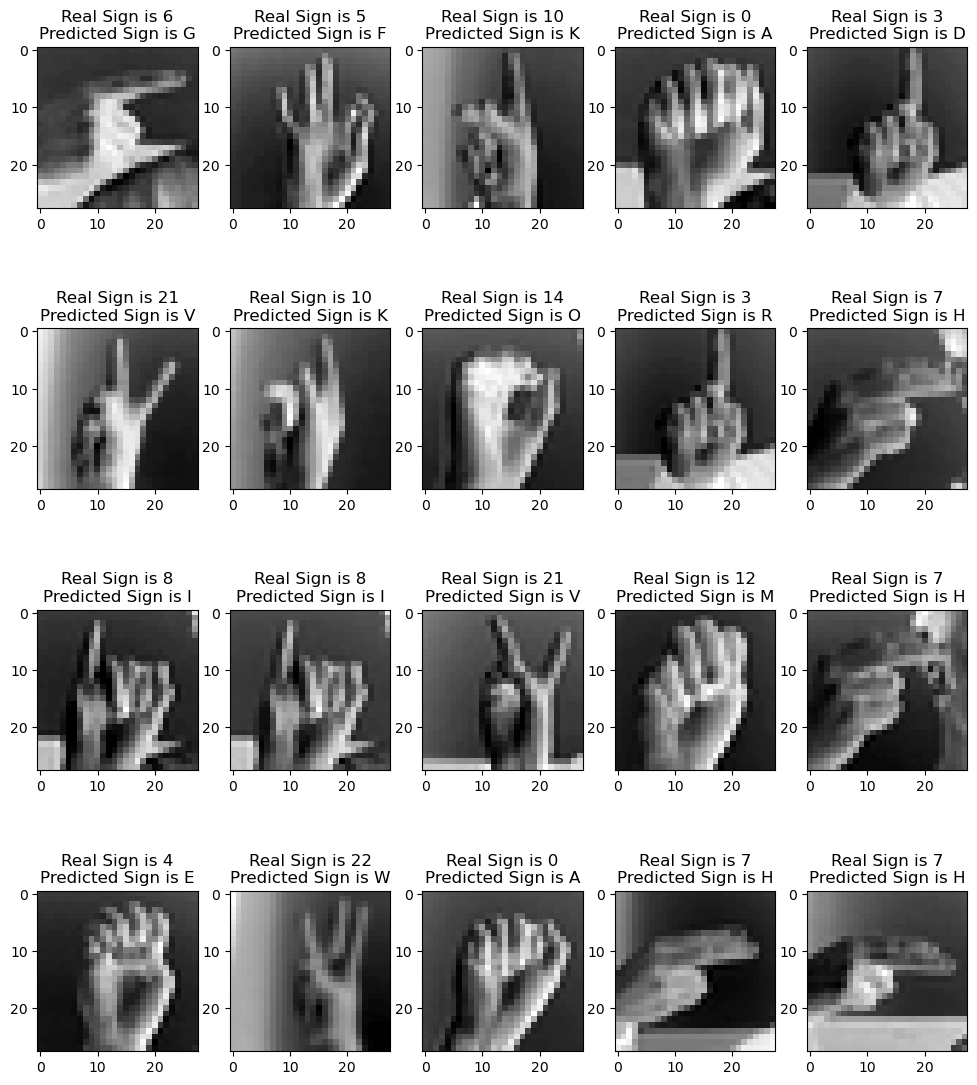

In [18]:
fig, axis = plt.subplots(4, 5, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_X__[i], cmap='binary')
    ax.set(title = f"Real Sign is {test_y[i]}\nPredicted Sign is {y_pred[i]}");